In [1]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from scipy import misc

import pandas as pd
import numpy as np
import seaborn as sns
import graphviz
import pydotplus
import io

In [2]:
data = pd.read_csv('datasets/spotify.csv')
train, test = train_test_split(data, test_size=0.15)

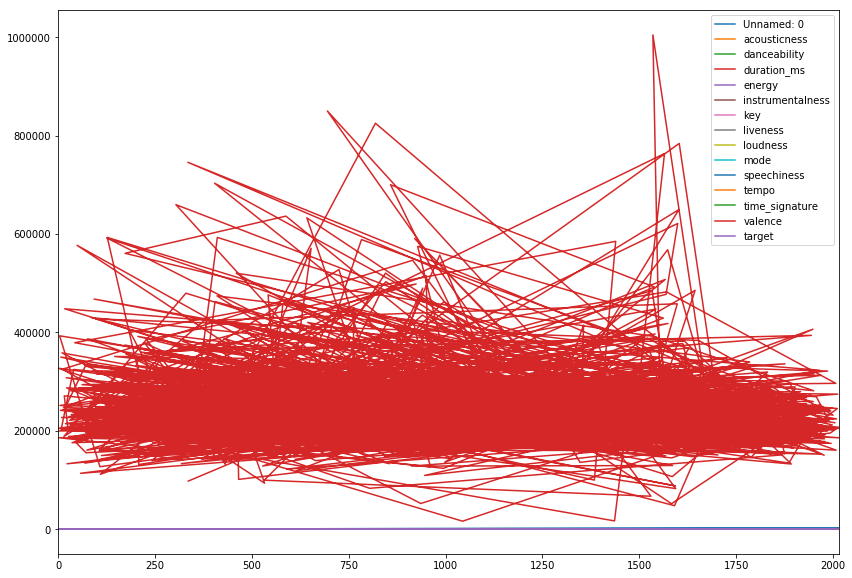

In [33]:
train.plot(figsize=(14,10))

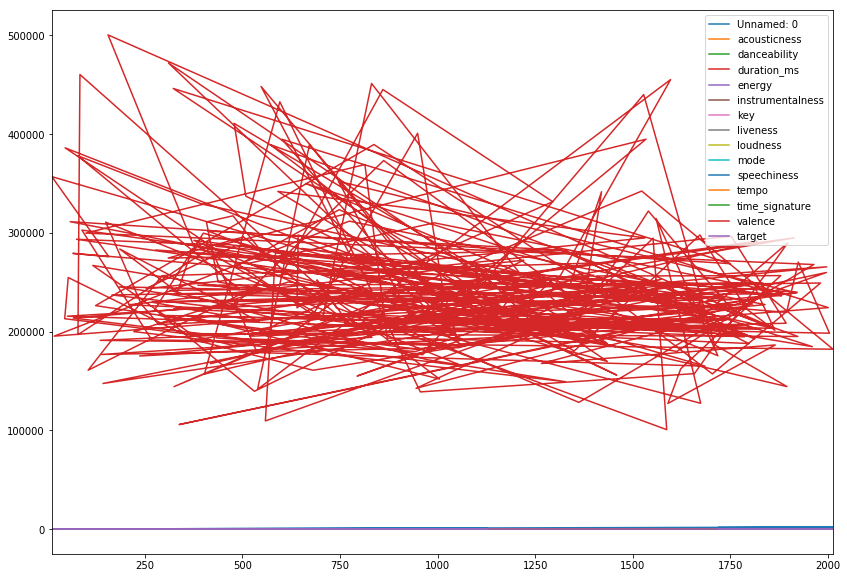

In [32]:
test.plot(figsize=(14,10))

In [5]:
#Tempo
pos_tempo = data[data['target']==1]['tempo']
neg_tempo = data[data['target']==0]['tempo']

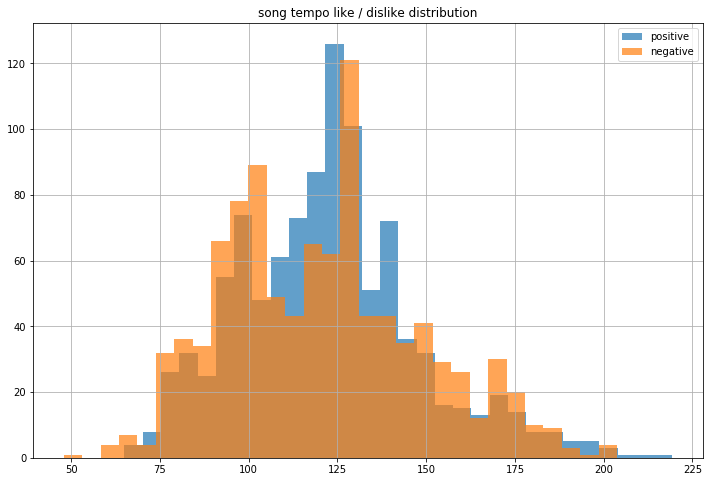

In [6]:
#Tempo
fig = plt.figure(figsize=(12,8))
plt.title("song tempo like / dislike distribution")
pos_tempo.hist(alpha = 0.7, bins = 30, label='positive')
neg_tempo.hist(alpha = 0.7, bins = 30, label='negative')
plt.legend(loc = "upper right")

In [7]:
#Danceability
pos_dance = data[data['target']==1]['danceability']
neg_dance = data[data['target']==0]['danceability']
#Duration(ms)
pos_duration = data[data['target']==1]['duration_ms']
neg_duration = data[data['target']==0]['duration_ms']
#Loudness
pos_loudness = data[data['target']==1]['loudness']
neg_loudness = data[data['target']==0]['loudness']
#Speechiness
pos_speechiness = data[data['target']==1]['speechiness']
neg_speechiness = data[data['target']==0]['speechiness']
#Valence
pos_valence = data[data['target']==1]['valence']
neg_valence = data[data['target']==0]['valence']
#Energy
pos_energy = data[data['target']==1]['energy']
neg_energy = data[data['target']==0]['energy']
#Acousticness
pos_acousticness = data[data['target']==1]['acousticness']
neg_acousticness = data[data['target']==0]['acousticness']
#Key
pos_key = data[data['target']==1]['key']
neg_key = data[data['target']==0]['key']
#Instrumentalness
pos_instrumentalness = data[data['target']==1]['instrumentalness']
neg_instrumentalness = data[data['target']==0]['instrumentalness']

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


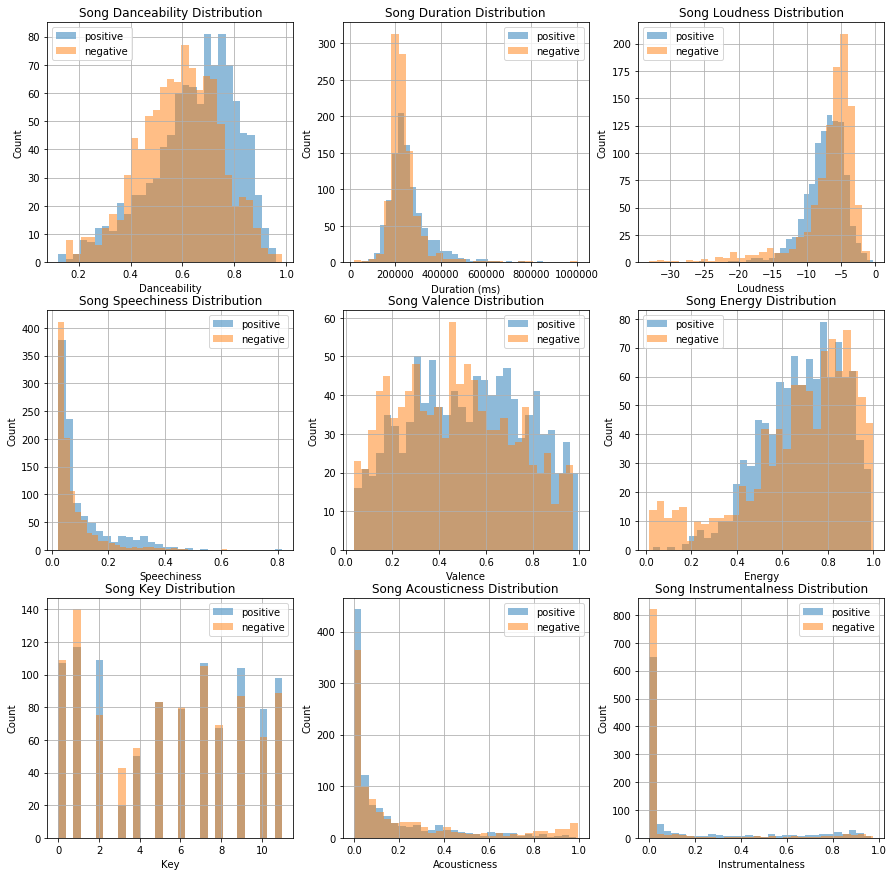

In [8]:
fig2 = plt.figure(figsize=(15, 15))

#Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Distribution')
pos_dance.hist(alpha=0.5, bins=30, label = 'positive')
ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha=0.5, bins=30, label = 'negative')
plt.legend()

#Duration
ax5 = fig2.add_subplot(332)
ax5.set_xlabel('Duration (ms)')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration Distribution')
pos_duration.hist(alpha=0.5, bins=30, label = 'positive')
ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha=0.5, bins=30, label = 'negative')
plt.legend()

#Loudness
ax7 = fig2.add_subplot(333)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title('Song Loudness Distribution')
pos_loudness.hist(alpha=0.5, bins=30, label = 'positive')
ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha=0.5, bins=30, label = 'negative')
plt.legend()

#Speechiness
ax9 = fig2.add_subplot(334)
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('Count')
ax9.set_title('Song Speechiness Distribution')
pos_speechiness.hist(alpha=0.5, bins=30, label = 'positive')
ax10 = fig2.add_subplot(334)
neg_speechiness.hist(alpha=0.5, bins=30,  label = 'negative')
plt.legend()

#Valence
ax11 = fig2.add_subplot(335)
ax11.set_xlabel('Valence')
ax11.set_ylabel('Count')
ax11.set_title('Song Valence Distribution')
pos_valence.hist(alpha=0.5, bins=30, label = 'positive')
ax12 = fig2.add_subplot(335)
neg_valence.hist(alpha=0.5, bins=30, label = 'negative')
plt.legend()

#Energy
ax13 = fig2.add_subplot(336)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title('Song Energy Distribution')
pos_energy.hist(alpha=0.5, bins=30, label = 'positive')
ax14 = fig2.add_subplot(336)
neg_energy.hist(alpha=0.5, bins=30, label = 'negative')
plt.legend()

#Key
ax14 = fig2.add_subplot(337)
ax14.set_xlabel('Key')
ax14.set_ylabel('Count')
ax14.set_title('Song Key Distribution')
pos_key.hist(alpha=0.5, bins=30, label = 'positive')
ax15 = fig2.add_subplot(337)
neg_key.hist(alpha=0.5, bins=30, label = 'negative')
plt.legend()

#Acousticness
ax16 = fig2.add_subplot(338)
ax16.set_xlabel('Acousticness')
ax16.set_ylabel('Count')
ax16.set_title('Song Acousticness Distribution')
pos_acousticness.hist(alpha=0.5, bins=30, label = 'positive')
ax17 = fig2.add_subplot(338)
neg_acousticness.hist(alpha=0.5, bins=30, label = 'negative')
plt.legend()

#Instrumentalness
ax18 = fig2.add_subplot(339)
ax18.set_xlabel('Instrumentalness')
ax18.set_ylabel('Count')
ax18.set_title('Song Instrumentalness Distribution')
pos_instrumentalness.hist(alpha=0.5, bins=30, label = 'positive')
ax19 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha=0.5, bins=30, label = 'negative')
plt.legend()

In [34]:
c = DecisionTreeClassifier(min_samples_split=100)
features = ['danceability', 'loudness', 'valence', 'energy', 'instrumentalness', 'acousticness', 'key', 'speechiness', 'duration_ms']

X_train = train[features]
y_train = train["target"]

X_test = test[features]
y_test = test["target"]

dt = c.fit(x_train, y_train)

def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParam["figure.figsize"] = (20,20)
    plt.imshow(img)

In [ ]:
show_tree(dt, features, 'dt01.png')